# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
import keras
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
from collections import Counter
from utils.textnormalization import text_normalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
from utils.word_vector import word_vector_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_excel('original_dataset.xlsx')
Corpus.rename(columns={'rating': 'Sentiment', 'review_description': 'Review'}, inplace=True)
Corpus.drop(columns=['company', 'Unnamed: 0'], inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus.tail()

Review Sentiment
67122  كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...   Neutral
67123  أول تجربة مع الخيال العلمي...الكثير من المعلوم...   Neutral
67124  مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...   Neutral
67125  الرسائل بين وائل و شوق كانت أجمل مافي الرواية....   Neutral
67126  استقبال سيء جدا وعدم الاستعداد للنزلاء . لا شي...   Neutral

In [5]:
Data = pd.read_csv('ArabicData.csv') # This Data Will Be Use For Word2Vec

# Sentiment Information

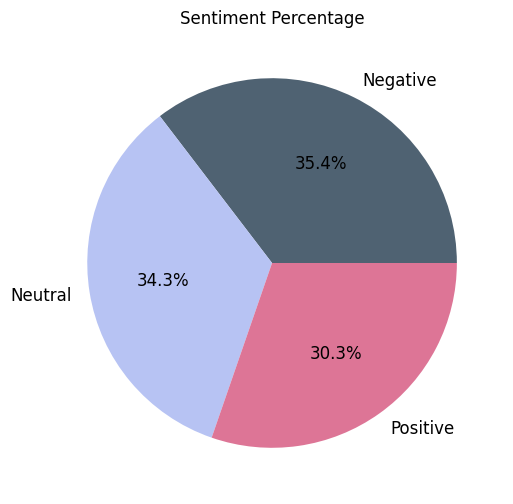

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

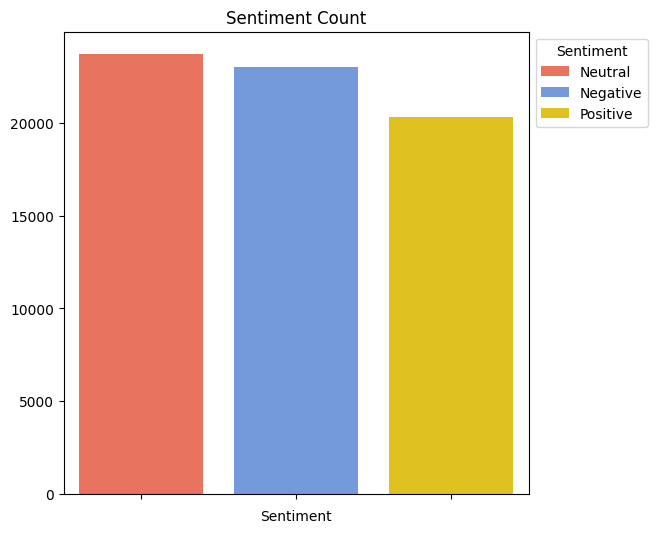

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

121706

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

2

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

176

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus["Review"].apply(lambda n:len(word_tokenize(n)))
Corpus["Number of Words 1"].sum()

1681074

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

25

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

1601

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

1

# Number Of Charachters Before Text Normalization

In [16]:
Corpus["Number of Charachters 1"] = Corpus["Review"].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 1"].sum()

6953312

# Average Number Of Charachters Before Text Normalization

In [17]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

104

# Maximum Number Of Charachters Before Text Normalization

In [18]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

6612

# Minimum Number Of Charachters Before Text Normalization

In [19]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

0

In [20]:
Corpus[Corpus['Number of Charachters 1'] == 0]

Review Sentiment  NumberOfSentences  \
475                              👎👎👎👎👎  Negative                  1   
925                                  😠  Negative                  1   
1404                                 😤  Negative                  1   
2054                        👍🏼👍🏼👍🏼👍🏼👍🏼  Positive                  1   
2297                    😢😢😢😢😢🙄🙄🙄🙄🙄😭😭😭😭  Negative                  1   
...                                ...       ...                ...   
46184                                👏  Positive                  1   
46229                              ✌️👌  Positive                  1   
46379  👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👍👍👍👍👍👍👍👍👍👍👍  Positive                  1   
46800                               👍😘  Positive                  1   
65250                    . . . . . . .   Neutral                  7   

       Number of Words 1  Number of Charachters 1  
475                    1                        0  
925                    1                        0  
1404                   1                        0  
2054                   1                        0  
2297                   1                        0  
...                  ...                      ...  
46184                  1                        0  
46229                  1                        0  
46379                  1                        0  
46800                  1                        0  
65250                  7                        0  

[814 rows x 5 columns]

# Most Frequent Words Before Text Normalization

In [21]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

Word  Count
1    من  34709
2    في  31846
3     و  24583
4     .  15871
5   على  12888
6    لا  12888
7   جدا  12579
8    ما  10911
9    ..  10097
10   عن   8739
11   أن   8165
12    ،   7417
13   كل   6766
14  كان   6318
15   ان   6284

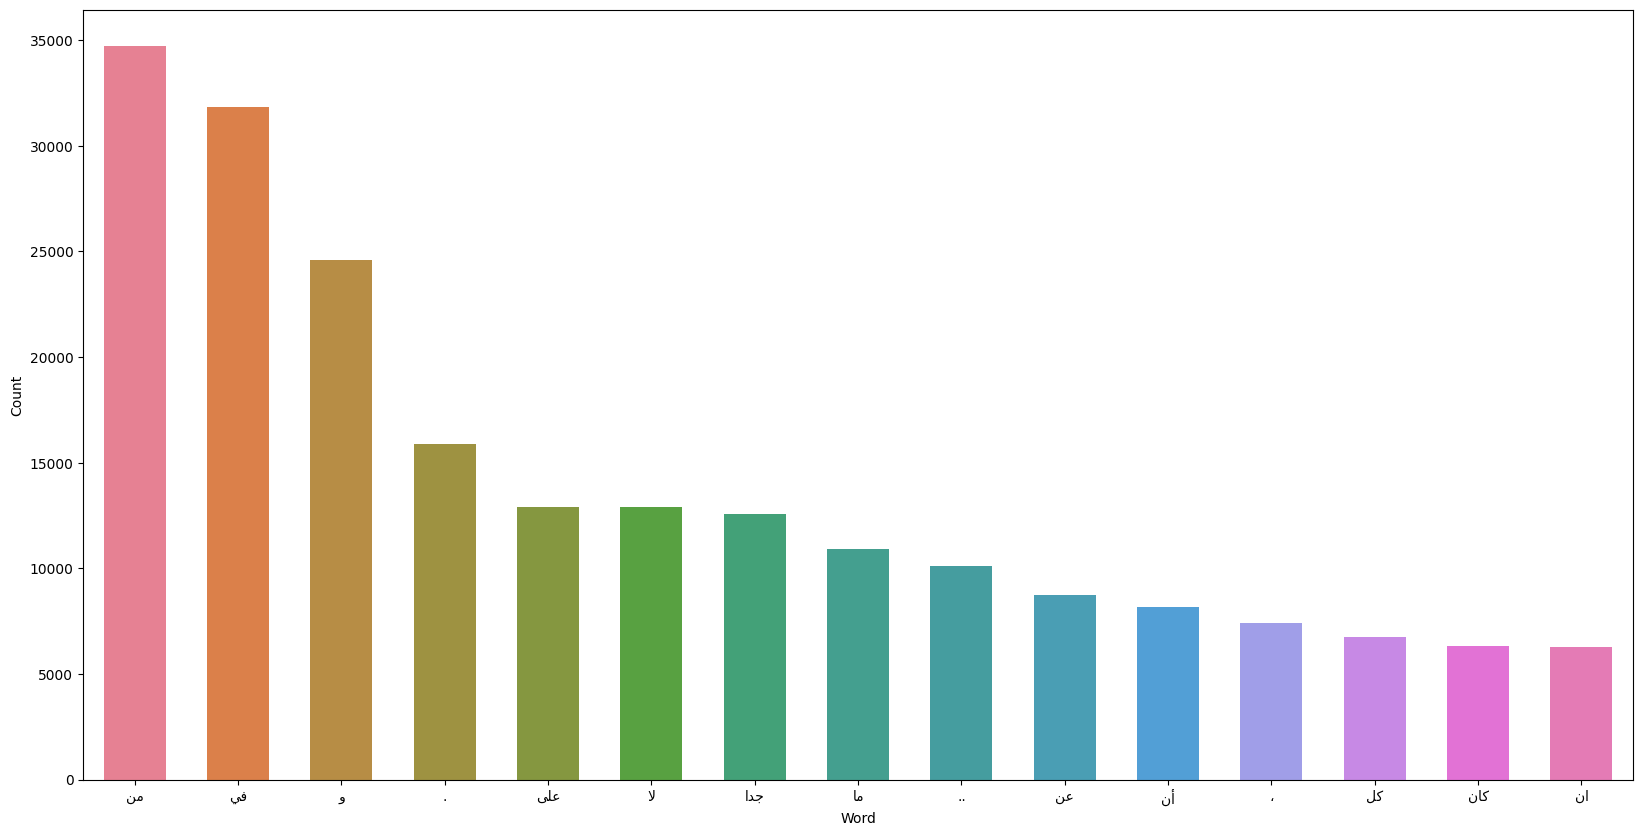

In [22]:
bar_plot(data=MostFrequentWordDF1, text = 'Word', x = 'Word', y='Count')

# Text Normalization

In [23]:
# Normalization techniques will be appied:
# - Converting text to lowercase.
# - Removing emojis, hashtags, emails, URLs, mentions, newline characters, and HTML tags.
# - Decreasing the number of consecutive repeated letters.
# - Removing duplicate words.
# - Expanding contractions.
# - Removing stop words.
# - Removing unicode and special characters.
# - Removing punctuation.
# - Removing single letters and duplicated letters.
# - Removing numbers.
# - Removing non-Arabic words.
# - Removing words longer than a specified length.
# - Removing whitespace.
# - Applying lemmatization.
# - remove_arabic_diacritics
# - normalize_alef_maqsurat 
# - normalize_teh_marbuta7
# - normalize_arabic_tatweel

Corpus['Normalized_Review'] = Corpus['Review'].apply(text_normalization)
Corpus.dropna(axis=1, inplace=True)
Corpus.to_csv('Normalized Corpus.csv')
Corpus.tail(5)

Review Sentiment  \
67122  كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...   Neutral   
67123  أول تجربة مع الخيال العلمي...الكثير من المعلوم...   Neutral   
67124  مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...   Neutral   
67125  الرسائل بين وائل و شوق كانت أجمل مافي الرواية....   Neutral   
67126  استقبال سيء جدا وعدم الاستعداد للنزلاء . لا شي...   Neutral   

       NumberOfSentences  Number of Words 1  Number of Charachters 1  \
67122                  1                 11                       39   
67123                  3                 69                      246   
67124                  3                 17                       65   
67125                  1                 31                      123   
67126                  3                 39                      182   

                                       Normalized_Review  
67122               كتاب جيد وان مملا الشيء منتصف الكتاب  
67123  تجربه الخيال العلميالكثير المعلومات بقالب ممتع...  
67124  مرضي الافطار لذيذ يوجد قائمه طعام الغرفهلم يتم...  
67125  الرسائل وائل شوق اجمل مافي الروايه مجرد رسائل ...  
67126  استقبال سيء وعدم الاستعداد للنزلاء الاستعداد ل...

# Number Of Unique Words

In [24]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

137388

# WordCloud

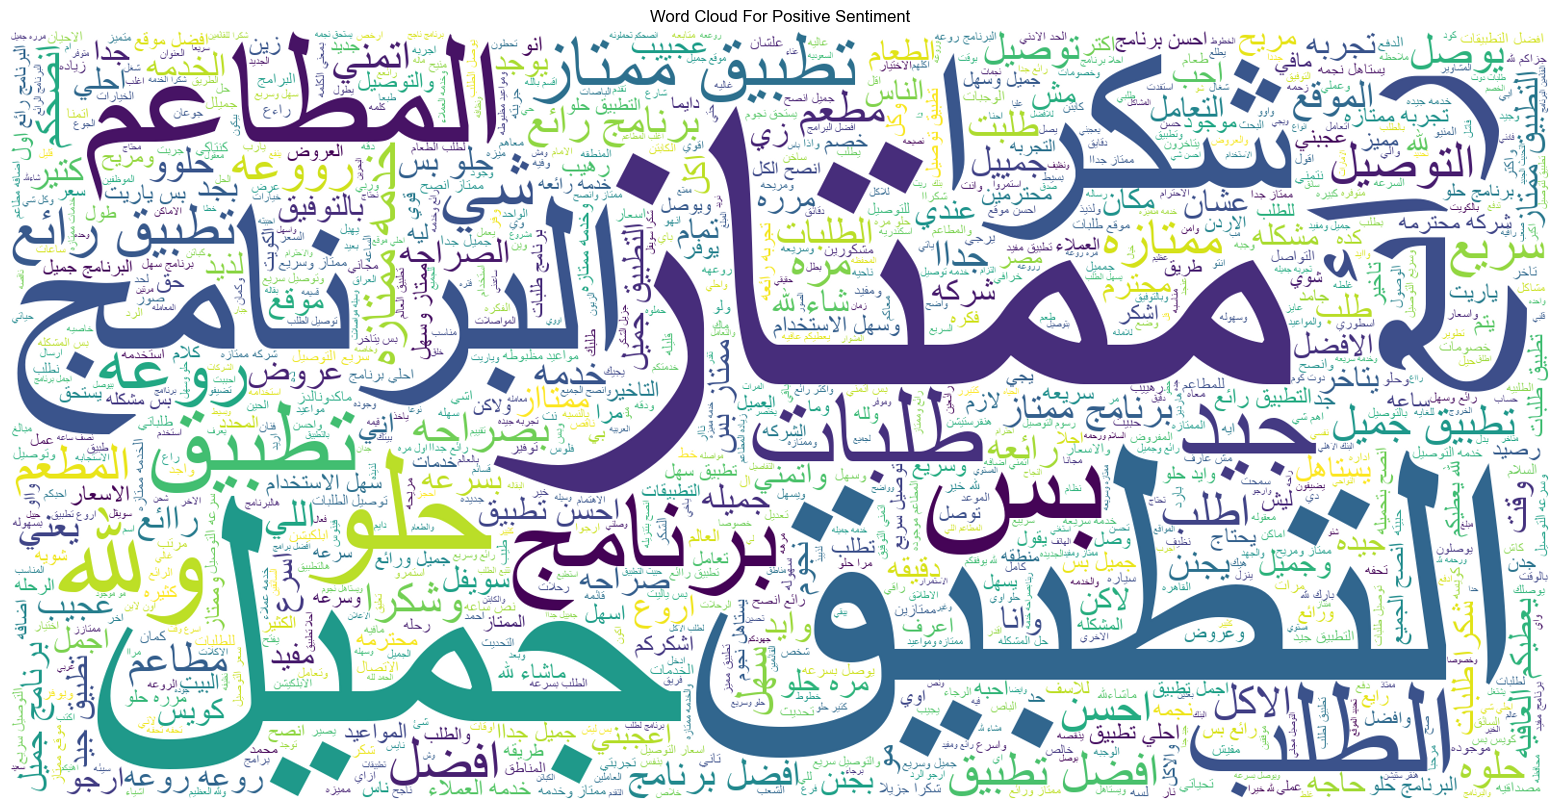

In [25]:
wordcloud(data=Corpus, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

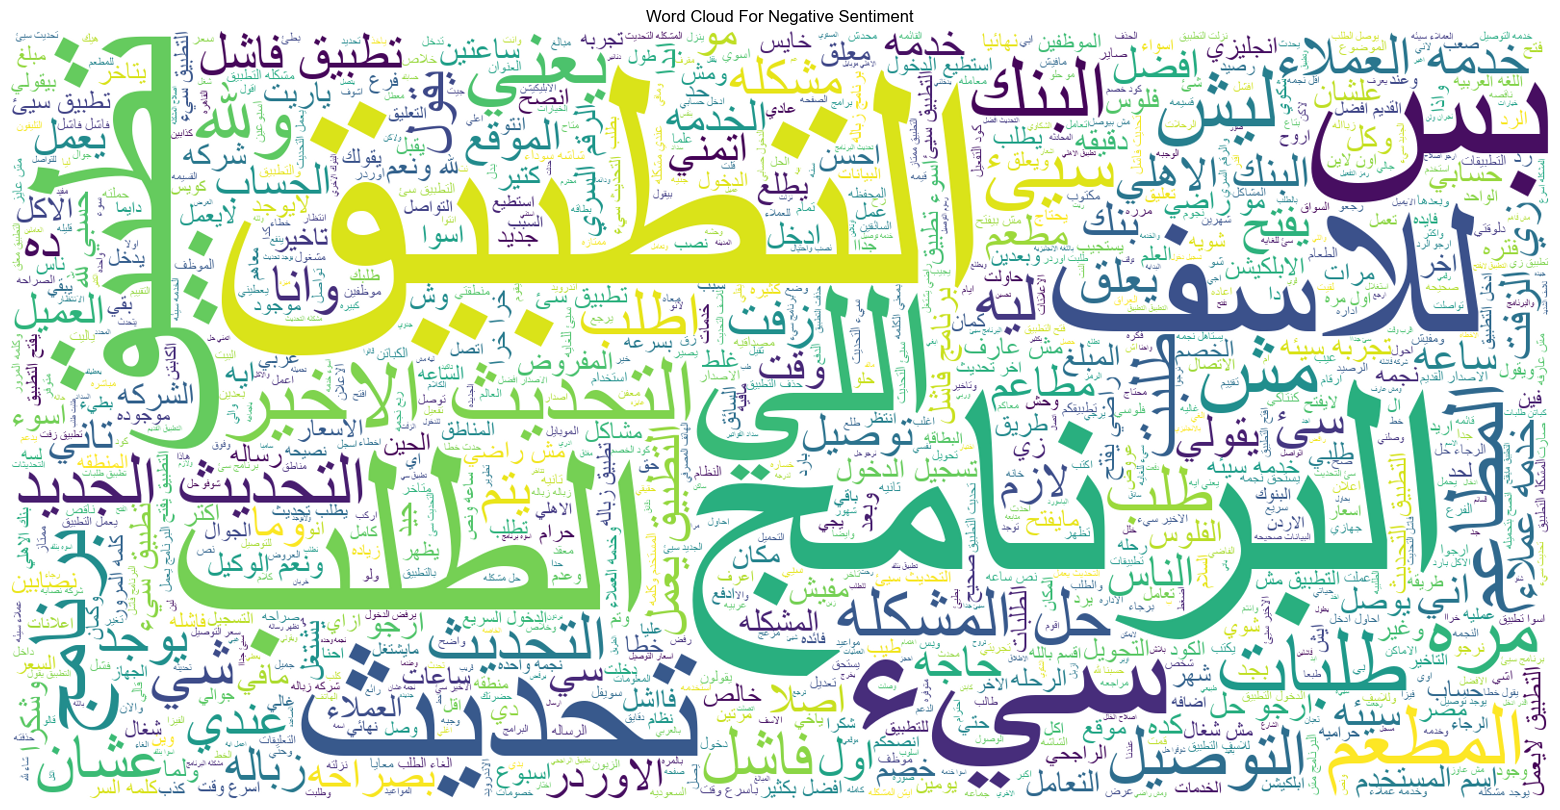

In [26]:
wordcloud(data=Corpus, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

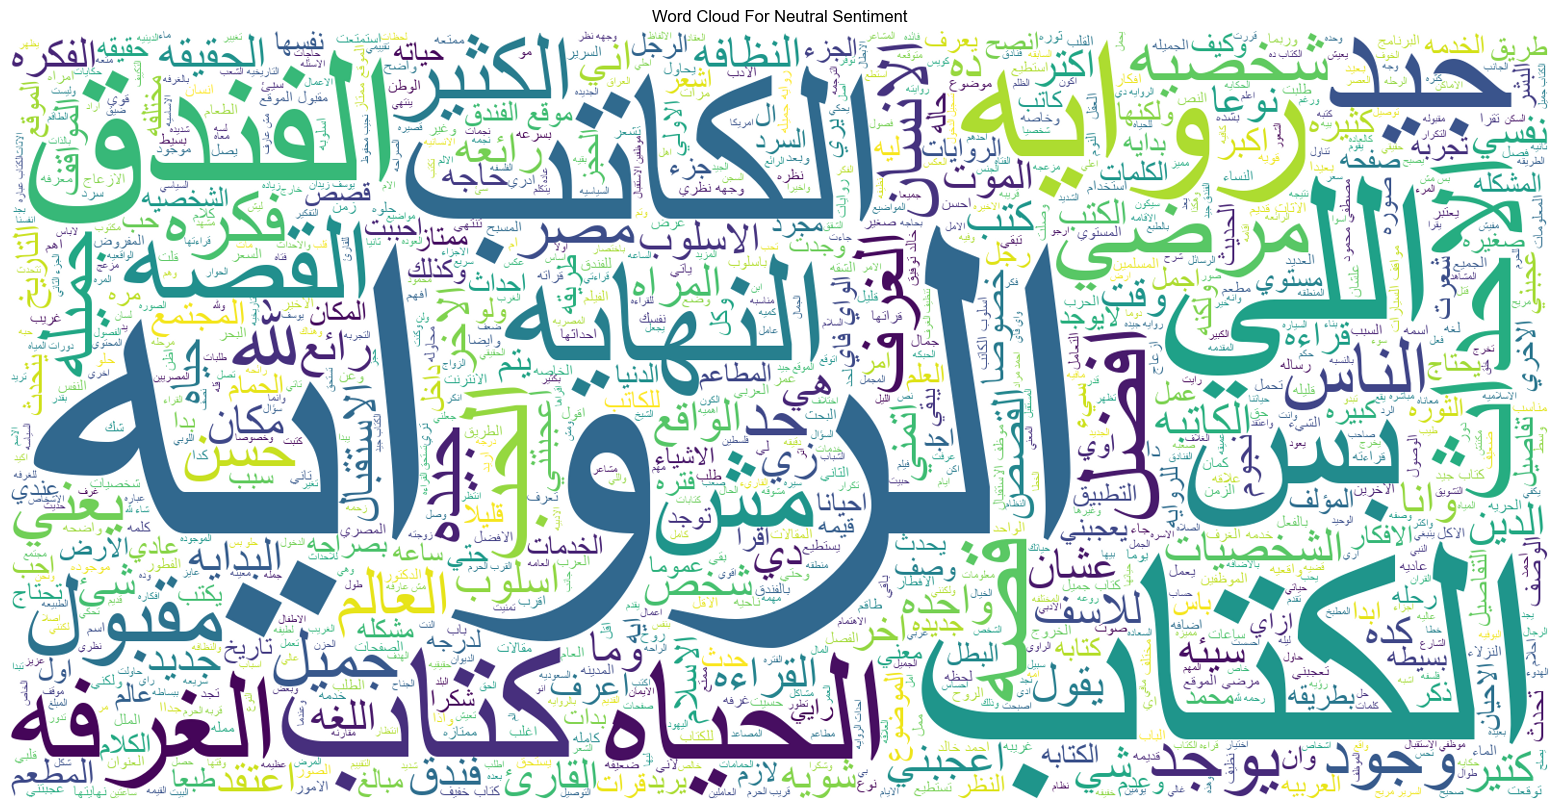

In [27]:
wordcloud(data=Corpus, target='Neutral', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

In [28]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

1067413

# Average Number Of Words After Text Normalization

In [29]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

16

# Maximum Number Of Word After Text Normalization

In [30]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

949

# Minimum Number Of Words After Text Normalization

In [31]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

1

# Number Of Charachters After Text Normalization

In [32]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters 2"].sum()

6533574

# Average Number Of Charachters After Text Normalization

In [33]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

100

# Maximum Number Of Charachters After Text Normalization

In [34]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

6257

# Minimum Number Of Charachters After Text Normalization

In [35]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

1

# Most Frequent Words After Text Normalization

In [36]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

Word  Count
1    التطبيق   5878
2    الروايه   5687
3     الكتاب   5495
4         بس   4659
5      تطبيق   4650
6         مش   3786
7      ممتاز   3464
8     الفندق   3355
9       الله   3320
10      اللي   3269
11  البرنامج   3101
12       جيد   3072
13      خدمه   2796
14      جميل   2794
15    الكاتب   2631

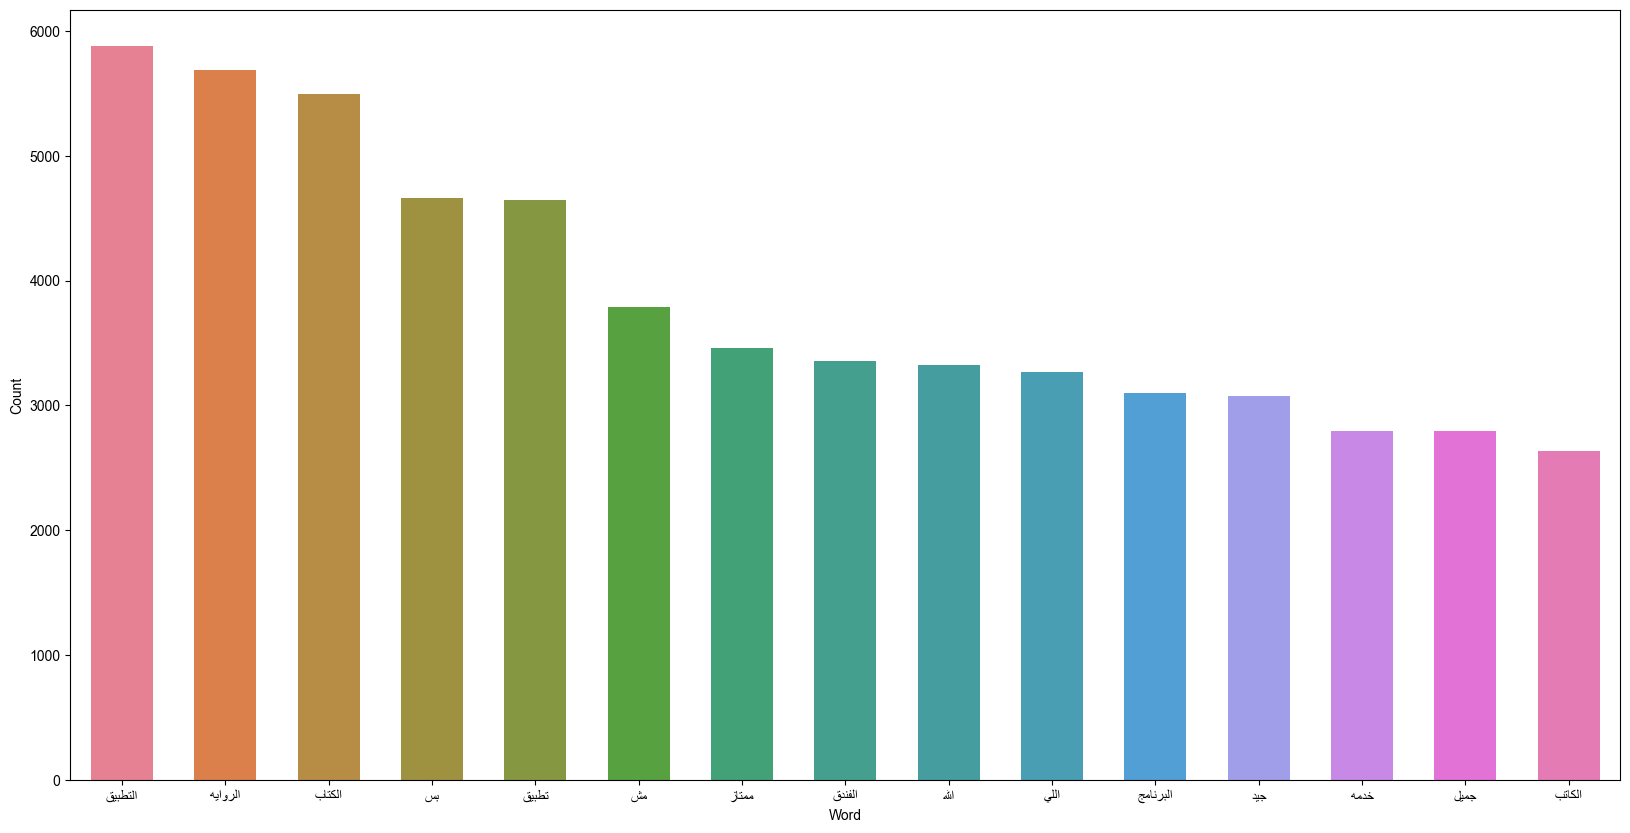

In [37]:
bar_plot(data=MostFrequentWordDF2, text = 'Word', x = 'Word', y='Count')

# Most Frequent Words Of Each Sentiment

**1-Positive**

In [38]:
Positive = Corpus[Corpus['Sentiment'] == 'Positive']

In [39]:
PositiveMostFrequentWord = Counter((Positive['Normalized_Review']).str.split().explode()).most_common(10)
PositiveMostFrequentWordDF = pd.DataFrame(PositiveMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
PositiveMostFrequentWordDF

Word  Count
1      ممتاز   2393
2      تطبيق   2107
3       جميل   1527
4       رائع   1471
5     برنامج   1332
6         بس   1192
7    التطبيق   1188
8        حلو   1097
9   البرنامج    886
10    ممتازه    866

**2-Neutral**

In [40]:
Neutral = Corpus[Corpus['Sentiment'] == 'Neutral']

In [41]:
NeutralMostFrequentWord = Counter((Neutral['Normalized_Review']).str.split().explode()).most_common(10)
NeutralMostFrequentWordDF = pd.DataFrame(NeutralMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
NeutralMostFrequentWordDF

Word  Count
1   الروايه   5687
2    الكتاب   5494
3    الفندق   3354
4    الكاتب   2631
5        بس   2549
6      اللي   2422
7      كتاب   2308
8       جيد   2293
9     روايه   2292
10     مرضي   1928

**3-Negative**

In [42]:
Negative = Corpus[Corpus['Sentiment'] == 'Negative']

In [43]:
NegativeMostFrequentWord = Counter((Negative['Normalized_Review']).str.split().explode()).most_common(10)
NegativeMostFrequentWordDF = pd.DataFrame(NegativeMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
NegativeMostFrequentWordDF

Word  Count
1    التطبيق   4370
2    التحديث   2436
3      تطبيق   2389
4   البرنامج   1991
5         مش   1806
6      الطلب   1485
7        سيء   1467
8       فاشل   1353
9       خدمه   1258
10       سيئ   1255

# Split The Dataset Into X And y

In [44]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [45]:
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

# Vectorizer

In [47]:
Vectorizer = TfidfVectorizer()
X_train_vec = Vectorizer.fit_transform(X_train)
X_test_vec = Vectorizer.transform(X_test)

# Word Mapping

In [48]:
Word_mapping = Vectorizer.vocabulary_
Word_mapping_ =pd.DataFrame((list(Word_mapping.items())), columns=['Word', 'Mapping'])
Word_mapping_.head()

Word  Mapping
0    مقبول    86579
1     طاقم    59549
2    الفنق    18735
3     خدوم    50346
4  وماقصرو   109723

# Machine Learning

**1-Naive Bayes**

In [49]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_vec, y_train=y_train)

MultinomialNB(alpha=1)

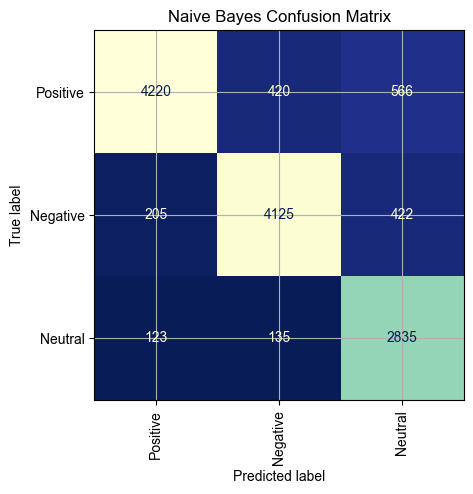

In [50]:
y_predNB = Naive_Bayes.predict(X_test_vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [51]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [52]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [53]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

Values
Accuracy     0.904426
Precision    0.856639
Sensitivity  0.856639
Specificity  0.928320
F1Score      0.856639
Error        0.095574

**2-Logistic Regression**

In [54]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_vec, y_train=y_train)


LogisticRegression()

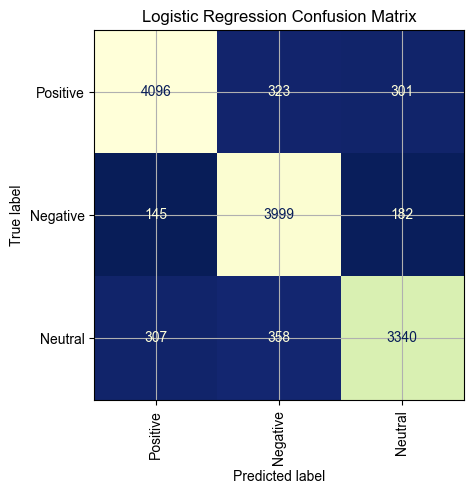

In [55]:
y_predLR = Logistic_Regression.predict(X_test_vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [56]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [57]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [58]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

Values
Accuracy     0.917452
Precision    0.876178
Sensitivity  0.876178
Specificity  0.938089
F1Score      0.876178
Error        0.082548

**3-Decision Tree**

In [59]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_vec, y_train=y_train)

DecisionTreeClassifier()

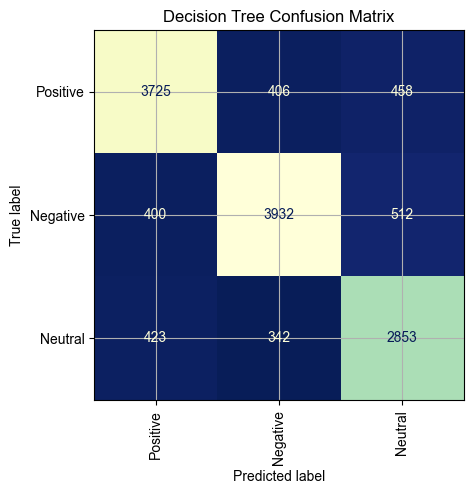

In [60]:
y_predDT = Decision_Tree.predict(X_test_vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [61]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [62]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [63]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

Values
Accuracy     0.870202
Precision    0.805302
Sensitivity  0.805302
Specificity  0.902651
F1Score      0.805302
Error        0.129798

**4-K Nearest Neighbors**

In [64]:
Algorithm =KNeighborsClassifier(metric='cosine', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_vec, y_train=y_train)

KNeighborsClassifier(metric='cosine')

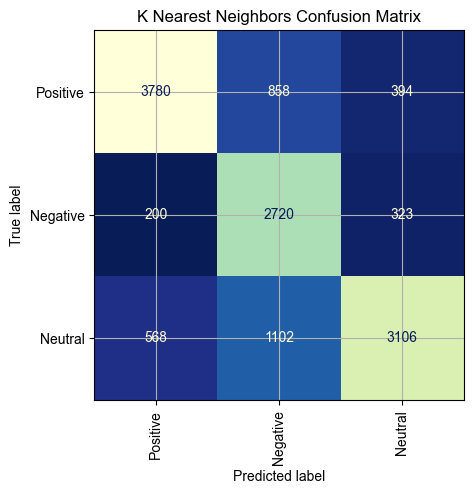

In [65]:
y_predKNN = K_Nearest_Neighbors.predict(X_test_vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [66]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [67]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [68]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

Values
Accuracy     0.824024
Precision    0.736036
Sensitivity  0.736036
Specificity  0.868018
F1Score      0.736036
Error        0.175976

**5-Random Forest**

In [69]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

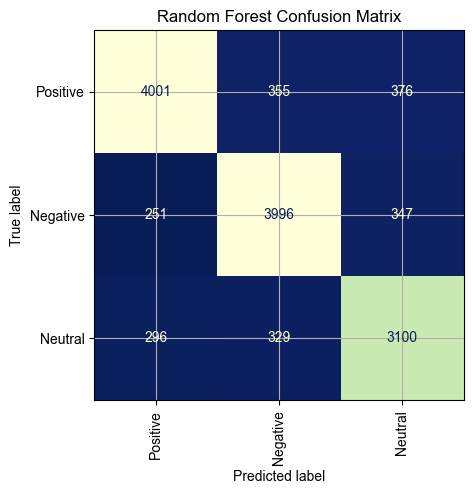

In [70]:
y_predRF = Random_Forest.predict(X_test_vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [71]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [72]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [73]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

Values
Accuracy     0.900186
Precision    0.850280
Sensitivity  0.850280
Specificity  0.925140
F1Score      0.850280
Error        0.099814

**6-SGD Classifier**

In [74]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_vec, y_train=y_train)

SGDClassifier()

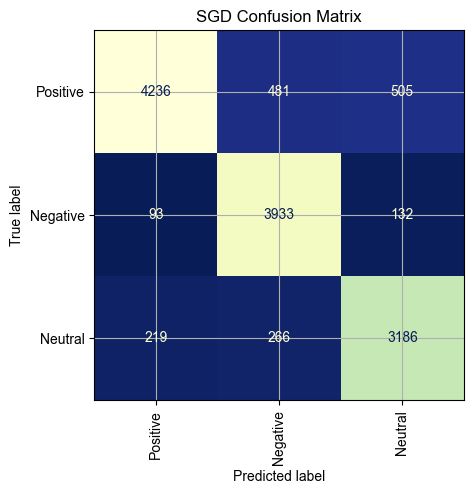

In [75]:
y_predSGD = SGD.predict(X_test_vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [76]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [77]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [78]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

Values
Accuracy     0.913366
Precision    0.870048
Sensitivity  0.870048
Specificity  0.935024
F1Score      0.870048
Error        0.086634

**7-SVM**

In [79]:
Algorithm = SVC(kernel='linear')
SVM = machine_learning_model(algorithm=Algorithm)
fit_model(model=SVM, X_train=X_train_vec, y_train=y_train)

SVC(kernel='linear')

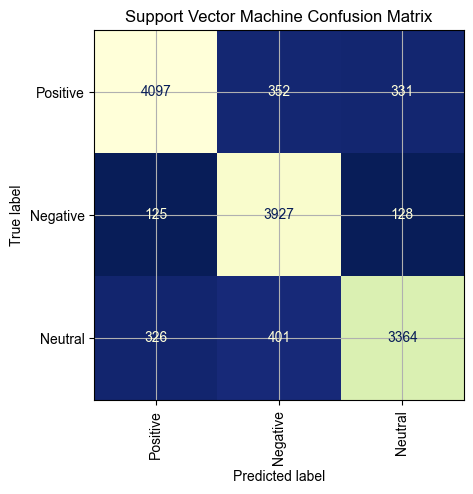

In [80]:
y_predSVM = SVM.predict(X_test_vec)
ConfusionMatrixSVM = confusion_matrix_(y_test = y_test, y_pred = y_predSVM)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSVM, name = 'Support Vector Machine')

In [81]:
False_PositiveSVM, True_PositiveSVM = false_true_positive(Confusin_Matrix = ConfusionMatrixSVM)
False_NegativeSVM, True_NegativeSVM = false_true_negative(Confusin_Matrix = ConfusionMatrixSVM)

In [82]:
AccuracySVM = accuracy_score(True_Positive = True_PositiveSVM, True_Negative = True_NegativeSVM, False_Positive =False_PositiveSVM, False_Negative = False_NegativeSVM)
PrecisionSVM= precision_score(True_Positive = True_PositiveSVM, False_Positive =False_PositiveSVM)

SensitivitySVM = sensitivity_score(True_Positive = True_PositiveSVM,  False_Negative = False_NegativeSVM)
SpecificitySVM = specificity_score(True_Negative = True_NegativeSVM, False_Positive = False_PositiveSVM)

F1ScoreSVM = f1_score(True_Positive = True_PositiveSVM, False_Negative = False_NegativeSVM, False_Positive = False_PositiveSVM)
ErrorSVM = error_rate(True_Positive = True_PositiveSVM, True_Negative = True_NegativeSVM, False_Positive =False_PositiveSVM, False_Negative = False_NegativeSVM)

In [83]:
performance_metrics_data_frame(Accuracy = AccuracySVM, Precision = PrecisionSVM, Sensitivity = SensitivitySVM, Specificity = SpecificitySVM, F1Score = F1ScoreSVM, Error = ErrorSVM)

Values
Accuracy     0.915051
Precision    0.872577
Sensitivity  0.872577
Specificity  0.936288
F1Score      0.872577
Error        0.084949

**8-MLPClassifier**

In [84]:
Algorithm = MLPClassifier(activation='relu', hidden_layer_sizes=16)
MLP = machine_learning_model(algorithm=Algorithm)
fit_model(model=MLP, X_train=X_train_vec, y_train=y_train)

MLPClassifier(hidden_layer_sizes=16)

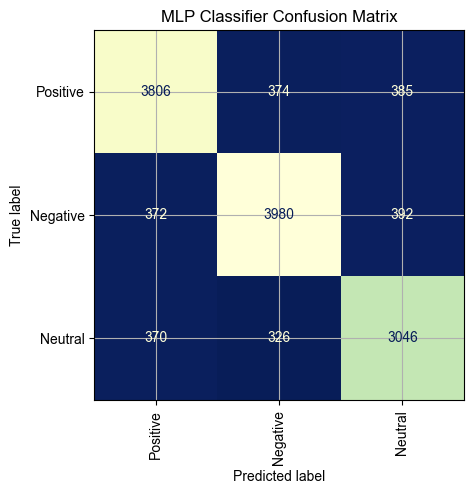

In [85]:
y_predMLP = MLP.predict(X_test_vec)
ConfusionMatrixMLP = confusion_matrix_(y_test = y_test, y_pred = y_predMLP)
confusion_matrix_display(confusionmatrix = ConfusionMatrixMLP, name = 'MLP Classifier')

In [86]:
False_PositiveMLP, True_PositiveMLP = false_true_positive(Confusin_Matrix = ConfusionMatrixMLP)
False_NegativeMLP, True_NegativeMLP = false_true_negative(Confusin_Matrix = ConfusionMatrixMLP)

In [87]:
AccuracyMLP = accuracy_score(True_Positive = True_PositiveMLP, True_Negative = True_NegativeMLP, False_Positive =False_PositiveMLP, False_Negative = False_NegativeMLP)
PrecisionMLP= precision_score(True_Positive = True_PositiveMLP, False_Positive =False_PositiveMLP)

SensitivityMLP = sensitivity_score(True_Positive = True_PositiveMLP,  False_Negative = False_NegativeMLP)
SpecificityMLP = specificity_score(True_Negative = True_NegativeMLP, False_Positive = False_PositiveMLP)

F1ScoreMLP = f1_score(True_Positive = True_PositiveMLP, False_Negative = False_NegativeMLP, False_Positive = False_PositiveMLP)
ErrorMLP = error_rate(True_Positive = True_PositiveMLP, True_Negative = True_NegativeMLP, False_Positive =False_PositiveMLP, False_Negative = False_NegativeMLP)

In [88]:
performance_metrics_data_frame(Accuracy = AccuracyMLP, Precision = PrecisionMLP, Sensitivity = SensitivityMLP, Specificity = SpecificityMLP, F1Score = F1ScoreMLP, Error = ErrorMLP)

Values
Accuracy     0.886650
Precision    0.829975
Sensitivity  0.829975
Specificity  0.914987
F1Score      0.829975
Error        0.113350

# Build Word2Vec

In [89]:
word_2_vec_(data = Data['Text'], vector_size=100, sg = 0, name = 'ArabicWord2Vec100D')

# Deep Learning

**1.Preprocessing**

In [90]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test, encoded_y_train, encoded_y_test, word_index= deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre', y_train_=y_train, y_test_=y_test)

In [91]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 120822

The Max Length Is : 939


**2.Word Index**

In [92]:
Word_Index = word_index
Word_Index_ =pd.DataFrame(((list(Word_Index.items()))), columns=['Word', 'Index'])
Word_Index_.head()

Word  Index
0    <oov>      1
1  التطبيق      2
2  الروايه      3
3   الكتاب      4
4       بس      5

**3.Generate Word Vector**

In [93]:
path = 'ArabicWord2Vec100D.txt'
embedding_dim, word_vector = word_vector_(path, vocab_size, tokenizer)

# Deep Learing Models

**9-LSTM**

Epoch 1/20
1632/1632 [==============================] - ETA: 0s - loss: 0.6084 - accuracy: 0.6970
Epoch 1: val_loss improved from inf to 0.35460, saving model to lstm.h5
1632/1632 [==============================] - 230s 139ms/step - loss: 0.6084 - accuracy: 0.6970 - val_loss: 0.3546 - val_accuracy: 0.8350 - lr: 1.0000e-04
Epoch 2/20
1632/1632 [==============================] - ETA: 0s - loss: 0.3268 - accuracy: 0.8425
Epoch 2: val_loss improved from 0.35460 to 0.30980, saving model to lstm.h5
1632/1632 [==============================] - 231s 142ms/step - loss: 0.3268 - accuracy: 0.8425 - val_loss: 0.3098 - val_accuracy: 0.8499 - lr: 1.0000e-04
Epoch 3/20
1632/1632 [==============================] - ETA: 0s - loss: 0.2887 - accuracy: 0.8596
Epoch 3: val_loss improved from 0.30980 to 0.29510, saving model to lstm.h5
1632/1632 [==============================] - 230s 141ms/step - loss: 0.2887 - accuracy: 0.8596 - val_loss: 0.2951 - val_accuracy: 0.8546 - lr: 1.0000e-04
Epoch 4/20
1632/1632

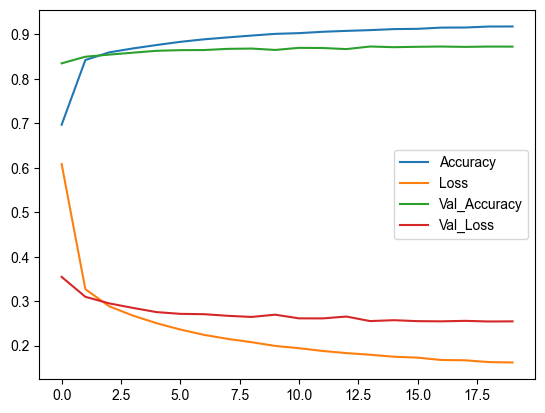

In [94]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units1=32, embeddings_matrix = word_vector, units2= 32)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=encoded_y_train, epochs=20, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, name='lstm')
plot_changes(histoty=history)  

**10-GRU**

Epoch 1/20
1632/1632 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.6501
Epoch 1: val_loss improved from inf to 0.39058, saving model to gru.h5
1632/1632 [==============================] - 220s 133ms/step - loss: 0.7020 - accuracy: 0.6501 - val_loss: 0.3906 - val_accuracy: 0.8145 - lr: 1.0000e-04
Epoch 2/20
1632/1632 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8397
Epoch 2: val_loss improved from 0.39058 to 0.31094, saving model to gru.h5
1632/1632 [==============================] - 232s 142ms/step - loss: 0.3312 - accuracy: 0.8397 - val_loss: 0.3109 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 3/20
1632/1632 [==============================] - ETA: 0s - loss: 0.2847 - accuracy: 0.8603
Epoch 3: val_loss improved from 0.31094 to 0.29246, saving model to gru.h5
1632/1632 [==============================] - 233s 143ms/step - loss: 0.2847 - accuracy: 0.8603 - val_loss: 0.2925 - val_accuracy: 0.8565 - lr: 1.0000e-04
Epoch 4/20
1632/1632 [=

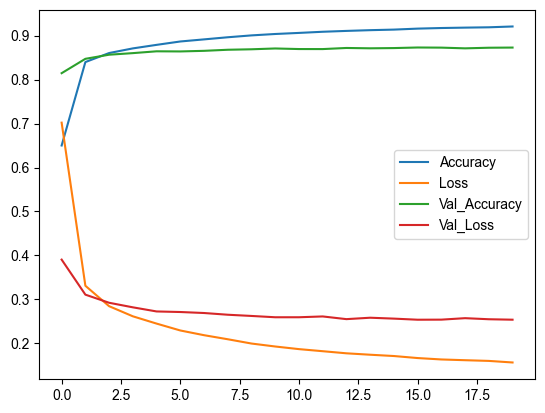

In [95]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units1=32, embeddings_matrix = word_vector, units2 = 32)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=encoded_y_train, epochs=20, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, name='gru')
plot_changes(histoty=history)

**11-Bidirectional LSTM** 

Epoch 1/20
1632/1632 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7522
Epoch 1: val_loss improved from inf to 0.34355, saving model to bio_lstm.h5
1632/1632 [==============================] - 386s 231ms/step - loss: 0.5333 - accuracy: 0.7522 - val_loss: 0.3435 - val_accuracy: 0.8344 - lr: 1.0000e-04
Epoch 2/20
1632/1632 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.8506
Epoch 2: val_loss improved from 0.34355 to 0.30881, saving model to bio_lstm.h5
1632/1632 [==============================] - 339s 208ms/step - loss: 0.3057 - accuracy: 0.8506 - val_loss: 0.3088 - val_accuracy: 0.8483 - lr: 1.0000e-04
Epoch 3/20
1632/1632 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.8637
Epoch 3: val_loss improved from 0.30881 to 0.29230, saving model to bio_lstm.h5
1632/1632 [==============================] - 334s 205ms/step - loss: 0.2778 - accuracy: 0.8637 - val_loss: 0.2923 - val_accuracy: 0.8550 - lr: 1.0000e-04
Epoch 4/

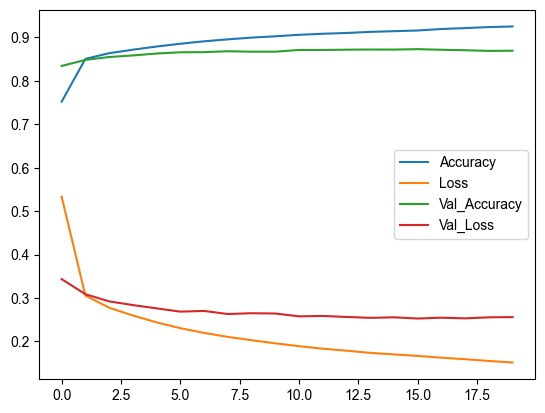

In [96]:
Bidirectional_LSTM=bidirectional_lstm(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units1=32, embeddings_matrix = word_vector, units2 = 32)
model_compile(model=Bidirectional_LSTM)
history = model_fit(model=Bidirectional_LSTM, X_train=encoded_X_train, y_train=encoded_y_train, epochs=20, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, name='bio_lstm')
plot_changes(histoty=history) 